In [1]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
prod_clusters = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\product_clusters.csv',dtype={'Item_Number':str}, index_col=0)

In [5]:
prod_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4468 entries, 1 to 4474
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Item_Number       4468 non-null   object 
 1   Item_Description  4468 non-null   object 
 2   Bottle_Volume     4468 non-null   int64  
 3   Bottle_Retail     4468 non-null   float64
 4   Bottles_Sold      4468 non-null   int64  
 5   cluster_name      4468 non-null   object 
 6   revenue           4468 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 279.2+ KB


In [8]:

everything_else = prod_clusters.loc[prod_clusters['cluster_name']=='Everything_Else',:]

In [9]:
everything_else.head(10)

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,cluster_name,revenue
1,10006,Scoresby Rare Scotch,750,7.70,4619,Everything_Else,35566.30
2,100077,Kraken Rum w/ Tiki Glass,750,15.68,2679,Everything_Else,42006.72
4,10009,Scoresby Rare Scotch,1000,10.11,1722,Everything_Else,17409.42
5,100148,Jack Daniels Single Barrel w/Snifter Glass,750,41.39,606,Everything_Else,25082.34
6,100202,Baileys Original Irish Cream w/2 Dessert Bowls,750,24.74,3160,Everything_Else,78178.40
7,100210,Clyde Mays Dualpack,750,30.00,66,Everything_Else,1980.00
8,100215,Tequila Rose Liqueur w/2 Shot Glasses,750,17.25,1191,Everything_Else,20544.75
9,100216,Tarantula Azul Holiday w/2 Shot Glasses,750,13.49,133,Everything_Else,1794.17
10,100248,Martell Blue Swift w/ 2 Glasses,750,31.47,47,Everything_Else,1479.09
11,100280,The Bitter Truth Cocktail Bar Pack,20,14.25,180,Everything_Else,2565.00


In [10]:
scaler = StandardScaler()

In [11]:
everything_else[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]] = scaler.fit_transform\
                                           (everything_else[['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']])
                                                   

everything_else[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled']].describe()

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled
count,3.865000e+03,3.865000e+03,3.865000e+03
mean,3.364277e-16,1.682857e-16,3.574401e-16
std,1.000129e+00,1.000129e+00,1.000129e+00
min,-2.729344e+00,-1.225166e+00,-4.122119e-01
25%,2.940176e-01,-7.271004e-01,-4.072315e-01
50%,2.940176e-01,-2.887442e-01,-3.646331e-01
75%,2.940176e-01,4.015575e-01,-7.555770e-02
max,2.157733e+00,4.770556e+00,8.195200e+00


determine optimal number of clusters

In [12]:
from sklearn.metrics import silhouette_score

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]

df_scaled = everything_else[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.5476749092196834
number of clusters =  3   silhouette score =  0.5613020736206006
number of clusters =  4   silhouette score =  0.5320984497321875
number of clusters =  5   silhouette score =  0.4273416563810066
number of clusters =  6   silhouette score =  0.4557098270790325
number of clusters =  7   silhouette score =  0.4524231643048396
number of clusters =  8   silhouette score =  0.4774914363708594
number of clusters =  9   silhouette score =  0.48211295803567356
number of clusters =  10   silhouette score =  0.46449113056409397


In [13]:
inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

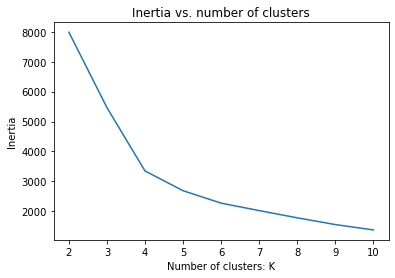

In [14]:
plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()

get three sub-clusters from everything_else

In [15]:
cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


model = KMeans(n_clusters=3, random_state=42)

model.fit(everything_else[cluster_cols])

everything_else['sub_cluster'] = model.predict(everything_else[cluster_cols])

C:\Users\dgarb\AppData\Local\Temp/ipykernel_17968/2650404986.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['sub_cluster'] = model.predict(everything_else[cluster_cols])


In [16]:
everything_else.head()

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,cluster_name,revenue,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,sub_cluster
1,10006,Scoresby Rare Scotch,750,7.70,4619,Everything_Else,35566.30,0.294018,-0.899433,0.077139,0
2,100077,Kraken Rum w/ Tiki Glass,750,15.68,2679,Everything_Else,42006.72,0.294018,-0.512049,-0.128435,0
4,10009,Scoresby Rare Scotch,1000,10.11,1722,Everything_Else,17409.42,1.329415,-0.782441,-0.229844,0
5,100148,Jack Daniels Single Barrel w/Snifter Glass,750,41.39,606,Everything_Else,25082.34,0.294018,0.736029,-0.348102,0
6,100202,Baileys Original Irish Cream w/2 Dessert Bowls,750,24.74,3160,Everything_Else,78178.40,0.294018,-0.072236,-0.077465,0


In [17]:
everything_else['Bottle_Volume_liters'] = everything_else['Bottle_Volume']/1000

C:\Users\dgarb\AppData\Local\Temp/ipykernel_17968/2100188245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['Bottle_Volume_liters'] = everything_else['Bottle_Volume']/1000


In [32]:
# price/volume
everything_else['price_per_ml'] = everything_else['Bottle_Retail'] / everything_else['Bottle_Volume']

C:\Users\dgarb\AppData\Local\Temp/ipykernel_17968/1856010719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['price_per_ml'] = everything_else['Bottle_Retail'] / everything_else['Bottle_Volume']


In [18]:
everything_else.groupby(['sub_cluster']).agg({'Bottle_Volume_liters' : 'mean', 'Bottle_Retail':'mean','Bottles_Sold':'mean' })

,Bottle_Volume_liters,Bottle_Retail,Bottles_Sold
sub_cluster,,,
0,0.775770,28.740278,1932.270192
1,0.168873,16.551072,3530.507799
2,0.634077,12.808009,41506.375000


In [20]:
everything_else.groupby(['sub_cluster']).agg({'Bottle_Volume' :['min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'] })

Bottle_Volume                                      Bottle_Retail  \
                      min   max         std median        mean           min   
sub_cluster                                                                    
0                     375  1200   77.297778  750.0  775.770192          3.20   
1                      20   400  141.732630   50.0  168.873484          0.99   
2                      50  1000  303.798625  750.0  634.077381          1.43   

                                                     Bottles_Sold         \
                    max        std median       mean          min    max   
sub_cluster                                                                
0            124.500000  20.314377  23.25  28.740278            1  22132   
1            121.680000  20.286858   9.00  16.551072            1  27050   
2             44.322201   8.453829  11.25  12.808009        21143  81229   

                                                  
                      std   median          mean  
sub_cluster                                       
0             3523.715797    283.0   1932.270192  
1             5193.467527   1024.0   3530.507799  
2            15513.086382  37184.5  41506.375000

In [24]:
from freq_pd import proc_freq

In [25]:
proc_freq(everything_else,'sub_cluster')

,sub_cluster,Frequency,Percent,Cumulative_Frequency,Cumulative_Percent
0,0,3120,80.72,3120,80.72
1,1,577,14.93,3697,95.65
2,2,168,4.35,3865,100.00


In [27]:
everything_else['str_volume'] = str(everything_else.Bottle_Volume)

C:\Users\dgarb\AppData\Local\Temp/ipykernel_17968/1745242950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['str_volume'] = str(everything_else.Bottle_Volume)


In [23]:
df = everything_else.groupby(['sub_cluster']).agg({'revenue':'sum'})
df.style.format("{:.0f}")


,revenue
sub_cluster,
0,108596566
1,18536815
2,88699199


In [26]:
everything_else.groupby(['sub_cluster']).agg({'Bottle_Volume':'nunique'})

,Bottle_Volume
sub_cluster,
0,10
1,8
2,6


In [33]:


everything_else.groupby(['sub_cluster']).agg({'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'] })

price_per_ml                                         Bottles_Sold  \
                     min       max       std    median      mean          min   
sub_cluster                                                                     
0                0.00320  0.226896  0.027564  0.030000  0.037813            1   
1                0.00688  2.433600  0.420472  0.129000  0.251869            1   
2                0.00320  0.774000  0.070692  0.018618  0.033385        21143   

                                                         
               max           std   median          mean  
sub_cluster                                              
0            22132   3523.715797    283.0   1932.270192  
1            27050   5193.467527   1024.0   3530.507799  
2            81229  15513.086382  37184.5  41506.375000